In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


Import Libraries

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# sns.set(style="whitegrid")


Load Datasets

In [6]:
#time_series_covid19_confirmed_US.csv
#AH_COVID-19_Death_Counts_by_County_and_Week_2020-present.csv
#----Aye path----#
cases_path = "/content/drive/My Drive/SJSU/Spring2025/CS22B_PythonDataAnalysis/Python22B_Project/time_series_covid19_confirmed_US.csv"
deaths_path = "/content/drive/My Drive/SJSU/Spring2025/CS22B_PythonDataAnalysis/Python22B_Project/AH_COVID-19_Death_Counts_by_County_and_Week_2020-present.csv"

#cases_df = pd.read_csv(cases_path)
#deaths_df = pd.read_csv(deaths_path)

#----Nathan path----#
deaths_df = pd.read_csv("/content/drive/MyDrive/AH_COVID-19_Death_Counts_by_County_and_Week_2020-present.csv")
cases_df = pd.read_csv("/content/drive/MyDrive/time_series_covid19_confirmed_US.csv")

Explore Data: Look for columns with dates, country names, state, etc.

In [7]:
print("Confirmed Cases Dataset:")
print(cases_df.head())
#print(cases_df.tail())


print("\nDeaths Dataset:")
print(deaths_df.head())
#print(deaths_df.tail())

Confirmed Cases Dataset:
        UID iso2 iso3  code3    FIPS   Admin2 Province_State Country_Region  \
0  84001001   US  USA    840  1001.0  Autauga        Alabama             US   
1  84001003   US  USA    840  1003.0  Baldwin        Alabama             US   
2  84001005   US  USA    840  1005.0  Barbour        Alabama             US   
3  84001007   US  USA    840  1007.0     Bibb        Alabama             US   
4  84001009   US  USA    840  1009.0   Blount        Alabama             US   

         Lat      Long_  ... 2/28/23  3/1/23  3/2/23  3/3/23  3/4/23  3/5/23  \
0  32.539527 -86.644082  ...   19732   19759   19759   19759   19759   19759   
1  30.727750 -87.722071  ...   69641   69767   69767   69767   69767   69767   
2  31.868263 -85.387129  ...    7451    7474    7474    7474    7474    7474   
3  32.996421 -87.125115  ...    8067    8087    8087    8087    8087    8087   
4  33.982109 -86.567906  ...   18616   18673   18673   18673   18673   18673   

   3/6/23  3/7/23  

Clean and Transform Confirmed Cases Data

In [8]:
# Remove unnecessary columns from cases_df
drop_cols = ['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Country_Region',
             'Lat', 'Long_', 'Combined_Key']
cases_df = cases_df.drop(columns=drop_cols, errors='ignore')
# Renaming Province_State as State to be consistent with the names before merging with Death Cases
cases_df = cases_df.rename(columns={"Province_State": "State"})

cases_df.head(10)


,State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,Alabama,0,0,0,0,0,0,0,0,0,...,19732,19759,19759,19759,19759,19759,19759,19759,19790,19790
1,Alabama,0,0,0,0,0,0,0,0,0,...,69641,69767,69767,69767,69767,69767,69767,69767,69860,69860
2,Alabama,0,0,0,0,0,0,0,0,0,...,7451,7474,7474,7474,7474,7474,7474,7474,7485,7485
3,Alabama,0,0,0,0,0,0,0,0,0,...,8067,8087,8087,8087,8087,8087,8087,8087,8091,8091
4,Alabama,0,0,0,0,0,0,0,0,0,...,18616,18673,18673,18673,18673,18673,18673,18673,18704,18704
5,Alabama,0,0,0,0,0,0,0,0,0,...,3020,3025,3025,3025,3025,3025,3025,3025,3030,3030
6,Alabama,0,0,0,0,0,0,0,0,0,...,6518,6538,6538,6538,6538,6538,6538,6538,6551,6551
7,Alabama,0,0,0,0,0,0,0,0,0,...,41228,41338,41338,41338,41338,41338,41338,41338,41421,41421
8,Alabama,0,0,0,0,0,0,0,0,0,...,10812,10846,10846,10846,10846,10846,10846,10846,10859,10859
9,Alabama,0,0,0,0,0,0,0,0,0,...,6732,6750,6750,6750,6750,6750,6750,6750,6755,6755


In [9]:
# Melt the DataFrame to long format
cases_long = pd.melt(cases_df,
                     id_vars=["State"],
                     var_name="Date",
                     value_name="Confirmed")
cases_long.head(10)


,State,Date,Confirmed
0,Alabama,1/22/20,0
1,Alabama,1/22/20,0
2,Alabama,1/22/20,0
3,Alabama,1/22/20,0
4,Alabama,1/22/20,0
5,Alabama,1/22/20,0
6,Alabama,1/22/20,0
7,Alabama,1/22/20,0
8,Alabama,1/22/20,0
9,Alabama,1/22/20,0


In [10]:
# Convert date to datetime format
cases_long["Date"] = pd.to_datetime(cases_long["Date"], format="%m/%d/%y")
#cases_long.head(10)
cases_long.tail(10)

,State,Date,Confirmed
3819896,Wyoming,2023-03-09,7713
3819897,Wyoming,2023-03-09,2299
3819898,Wyoming,2023-03-09,10008
3819899,Wyoming,2023-03-09,2316
3819900,Wyoming,2023-03-09,12507
3819901,Wyoming,2023-03-09,12134
3819902,Wyoming,2023-03-09,6406
3819903,Wyoming,2023-03-09,0
3819904,Wyoming,2023-03-09,2755
3819905,Wyoming,2023-03-09,1905


Checking for nulls

In [11]:
print(cases_long.columns.tolist())
print(cases_long.isnull().sum())

['State', 'Date', 'Confirmed']
State        0
Date         0
Confirmed    0
dtype: int64


Clean Death Data

In [12]:
# Preview columns
print(deaths_df.columns)
#deaths_df.head(5)

#drop_cols1 = ['STFIPS', 'COFIPS', 'FIPS Code', 'Urban Rural Code', 'Footnote']
#deaths_df = deaths_df.drop(columns= drop_cols1)
deaths_df.tail(5)

Index(['Data As Of', 'MMWR Week', 'Week-Ending Date',
       'Jurisdiction of Occurrence', 'State', 'County', 'STFIPS', 'COFIPS',
       'FIPS Code', 'Urban Rural Code', 'COVID-19 Deaths', 'Total Deaths',
       'Footnote'],
      dtype='object')


,Data As Of,MMWR Week,Week-Ending Date,Jurisdiction of Occurrence,State,County,STFIPS,COFIPS,FIPS Code,Urban Rural Code,COVID-19 Deaths,Total Deaths,Footnote
534135,04/05/2023,9,03/04/2023,United States,WY,Weston County,56,45,56045,Noncore,0.0,NaN,One or more data cells have counts between 1-9...
534136,04/05/2023,10,03/11/2023,United States,WY,Weston County,56,45,56045,Noncore,0.0,NaN,One or more data cells have counts between 1-9...
534137,04/05/2023,11,03/18/2023,United States,WY,Weston County,56,45,56045,Noncore,0.0,NaN,One or more data cells have counts between 1-9...
534138,04/05/2023,12,03/25/2023,United States,WY,Weston County,56,45,56045,Noncore,0.0,0.0,NaN
534139,04/05/2023,13,04/01/2023,United States,WY,Weston County,56,45,56045,Noncore,0.0,NaN,One or more data cells have counts between 1-9...


In [13]:

# Convert 'Week Ending Date' to datetime
deaths_df["Week-Ending Date"] = pd.to_datetime(deaths_df["Week-Ending Date"])
deaths_df.head(5)


,Data As Of,MMWR Week,Week-Ending Date,Jurisdiction of Occurrence,State,County,STFIPS,COFIPS,FIPS Code,Urban Rural Code,COVID-19 Deaths,Total Deaths,Footnote
0,04/05/2023,1,2020-01-04,United States,AK,Aleutians East Borough,2,13,2013,Noncore,0.0,0.0,NaN
1,04/05/2023,2,2020-01-11,United States,AK,Aleutians East Borough,2,13,2013,Noncore,0.0,0.0,NaN
2,04/05/2023,3,2020-01-18,United States,AK,Aleutians East Borough,2,13,2013,Noncore,0.0,0.0,NaN
3,04/05/2023,4,2020-01-25,United States,AK,Aleutians East Borough,2,13,2013,Noncore,0.0,0.0,NaN
4,04/05/2023,5,2020-02-01,United States,AK,Aleutians East Borough,2,13,2013,Noncore,0.0,0.0,NaN


In [14]:
# Select relevant columns
deaths_clean = deaths_df[["State", "Week-Ending Date", "COVID-19 Deaths"]]
deaths_clean = deaths_clean.rename(columns={"Week-Ending Date": "Date"})
deaths_clean.tail(5)

,State,Date,COVID-19 Deaths
534135,WY,2023-03-04,0.0
534136,WY,2023-03-11,0.0
534137,WY,2023-03-18,0.0
534138,WY,2023-03-25,0.0
534139,WY,2023-04-01,0.0


Convert Weekly Deaths to Daily

In [15]:
# # Create a new DataFrame with 7 repeated days per week
# expanded_deaths = pd.DataFrame()

# for index, row in deaths_clean.iterrows(): # iterrows() : to iterate over the rows of a DataFrame.
#     start_date = row["Date"] - pd.Timedelta(days=6)  # Start of the week
#     for i in range(7):
#         daily_row = {
#             "Province_State": row["Province_State"],
#             "Date": start_date + pd.Timedelta(days=i),
#             "COVID-19 Daily Deaths": row["COVID-19 Deaths"] / 7
#         }
#         expanded_deaths = expanded_deaths.append(daily_row, ignore_index=True)


# Create an empty list to store the rows for daily deaths
expanded_deaths_list = []

# Loop through each row in the weekly deaths data
for index, row in deaths_clean.iterrows():
    # Calculate the start of the week by subtracting 6 days from the end date
    start_date = row["Date"] - pd.Timedelta(days=6)

    # Spread the weekly death count equally over 7 days
    for i in range(7):
        daily_row = {
            "State": row["State"],
            "Date": start_date + pd.Timedelta(days=i),
            "COVID-19 Daily Deaths": row["COVID-19 Deaths"] / 7
        }
        # Append the daily row as a dictionary to the list
        expanded_deaths_list.append(daily_row)

# Convert the list of daily rows into a DataFrame
expanded_deaths = pd.DataFrame(expanded_deaths_list)

# Check the first few rows to confirm
print(expanded_deaths.head())



  State       Date  COVID-19 Daily Deaths
0    AK 2019-12-29                    0.0
1    AK 2019-12-30                    0.0
2    AK 2019-12-31                    0.0
3    AK 2020-01-01                    0.0
4    AK 2020-01-02                    0.0


In [16]:
expanded_deaths.tail(10)

,State,Date,COVID-19 Daily Deaths
3738970,WY,2023-03-23,0.0
3738971,WY,2023-03-24,0.0
3738972,WY,2023-03-25,0.0
3738973,WY,2023-03-26,0.0
3738974,WY,2023-03-27,0.0
3738975,WY,2023-03-28,0.0
3738976,WY,2023-03-29,0.0
3738977,WY,2023-03-30,0.0
3738978,WY,2023-03-31,0.0
3738979,WY,2023-04-01,0.0


Convert Abbreviations to Full State Names from expended_deaths

In [17]:
us_state_abbrev = {
    'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California',
    'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware', 'FL': 'Florida', 'GA': 'Georgia',
    'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa',
    'KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland',
    'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi', 'MO': 'Missouri',
    'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire', 'NJ': 'New Jersey',
    'NM': 'New Mexico', 'NY': 'New York', 'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio',
    'OK': 'Oklahoma', 'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina',
    'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah', 'VT': 'Vermont',
    'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming'
}

expanded_deaths["State"] = expanded_deaths["State"].map(us_state_abbrev)


In [18]:
expanded_deaths.head(10)

,State,Date,COVID-19 Daily Deaths
0,Alaska,2019-12-29,0.0
1,Alaska,2019-12-30,0.0
2,Alaska,2019-12-31,0.0
3,Alaska,2020-01-01,0.0
4,Alaska,2020-01-02,0.0
5,Alaska,2020-01-03,0.0
6,Alaska,2020-01-04,0.0
7,Alaska,2020-01-05,0.0
8,Alaska,2020-01-06,0.0
9,Alaska,2020-01-07,0.0


Checking How many states and cases we have

In [19]:
print(cases_long["State"].nunique())
print(len(cases_long))


58
3819906


In [20]:
print(expanded_deaths["State"].value_counts().head())

State
Texas       302260
Georgia     189210
Virginia    158270
Kentucky    142800
Missouri    136850
Name: count, dtype: int64


In [21]:
print(cases_long["State"].value_counts().head())

State
Texas       292608
Georgia     184023
Virginia    154305
Kentucky    139446
Missouri    134874
Name: count, dtype: int64


Before merging, aggregate the case counts for each State and Date

In [28]:
# Group case data by State and Date, summing over all counties
cases_clean = cases_long.groupby(["State", "Date"])["Confirmed"].sum().reset_index()
print(cases_clean.head())

     State       Date  Confirmed
0  Alabama 2020-01-22          0
1  Alabama 2020-01-23          0
2  Alabama 2020-01-24          0
3  Alabama 2020-01-25          0
4  Alabama 2020-01-26          0


Merge Case and Death Data

In [29]:
# Merge on State and Date
merged_df = pd.merge(cases_clean, expanded_deaths, on=["State", "Date"], how="left")
# Fill missing death values with 0
merged_df["COVID-19 Daily Deaths"] = merged_df["COVID-19 Daily Deaths"].fillna(0)


Top 5 States with the highest total confirmed cases

In [30]:
# Top 5 states with highest total confirmed cases
top_cases = merged_df.groupby("State")["Confirmed"].max().sort_values(ascending=False).head(5)
print("Top 5 States by Total Confirmed Cases:")
print(top_cases)

Top 5 States by Total Confirmed Cases:
State
California    12129699
Texas          8466220
Florida        7574590
New York       6794738
Illinois       4083292
Name: Confirmed, dtype: int64


Top 5 States with the highest total deaths

In [31]:
# Top 5 states with highest total deaths
top_deaths = merged_df.groupby("State")["COVID-19 Daily Deaths"].sum().sort_values(ascending=False).head(5)
print("Top 5 States by Total Deaths:")
print(top_deaths)


Top 5 States by Total Deaths:
State
California      93747.428571
Texas           79184.428571
New York        66411.428571
Florida         64517.857143
Pennsylvania    36632.571429
Name: COVID-19 Daily Deaths, dtype: float64


Top 5 Total Cases - Bar Chart

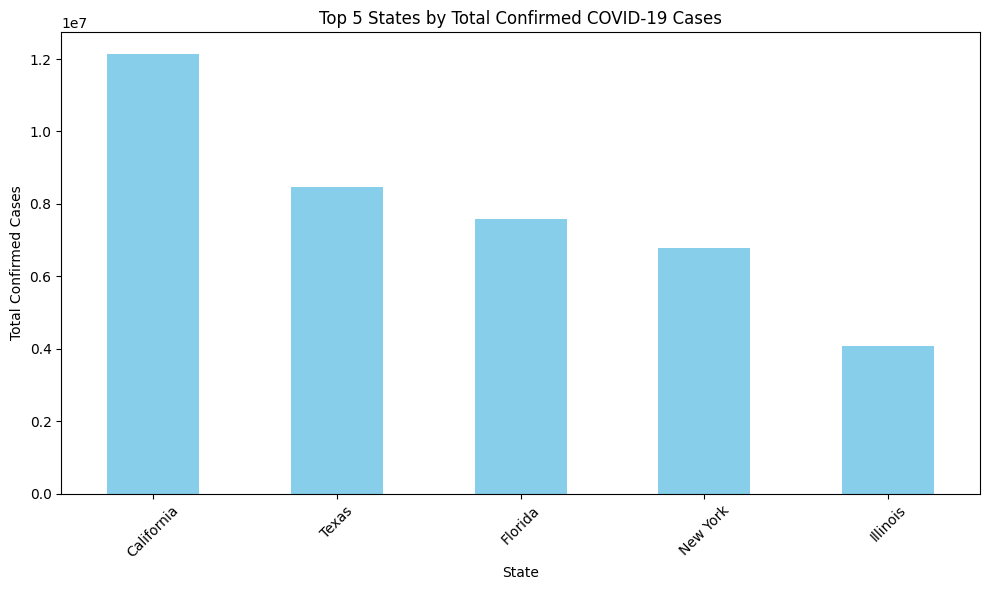

In [32]:
import matplotlib.pyplot as plt

# Get top 5 states by confirmed cases
top_cases = merged_df.groupby("State")["Confirmed"].max().sort_values(ascending=False).head(5)

# Plot
plt.figure(figsize=(10, 6))
top_cases.plot(kind='bar', color='skyblue')
plt.title("Top 5 States by Total Confirmed COVID-19 Cases")
plt.ylabel("Total Confirmed Cases")
plt.xlabel("State")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Top 5 Total Deaths - Bar Chart

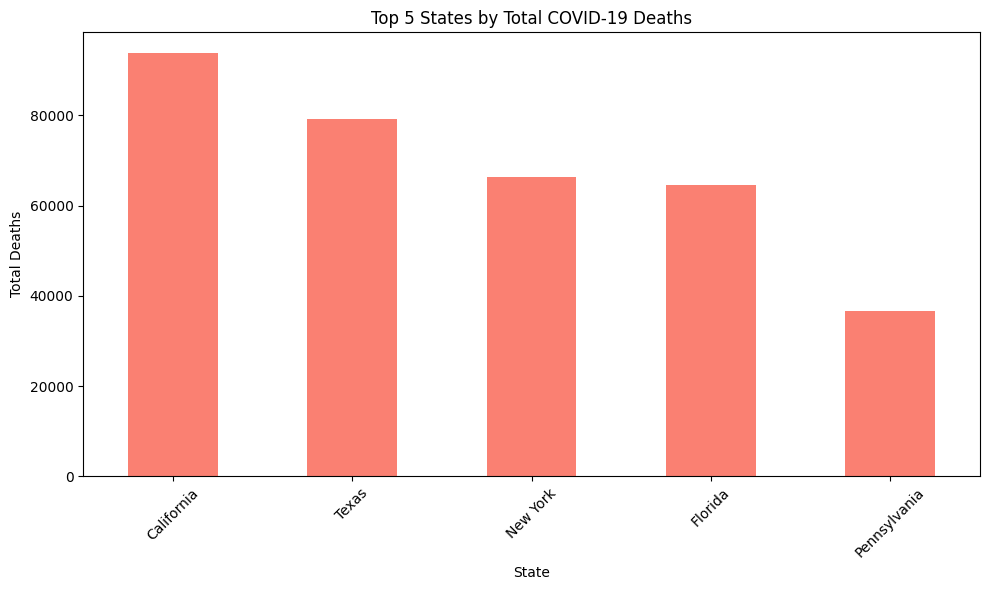

In [33]:
# Get top 5 states by total deaths
top_deaths = merged_df.groupby("State")["COVID-19 Daily Deaths"].sum().sort_values(ascending=False).head(5)

# Plot
plt.figure(figsize=(10, 6))
top_deaths.plot(kind='bar', color='salmon')
plt.title("Top 5 States by Total COVID-19 Deaths")
plt.ylabel("Total Deaths")
plt.xlabel("State")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [34]:
merged_df.tail(10)

,State,Date,Confirmed,COVID-19 Daily Deaths
3599297,Wyoming,2023-03-09,185385,0.0
3599298,Wyoming,2023-03-09,185385,0.0
3599299,Wyoming,2023-03-09,185385,0.0
3599300,Wyoming,2023-03-09,185385,0.0
3599301,Wyoming,2023-03-09,185385,0.0
3599302,Wyoming,2023-03-09,185385,0.0
3599303,Wyoming,2023-03-09,185385,0.0
3599304,Wyoming,2023-03-09,185385,0.0
3599305,Wyoming,2023-03-09,185385,0.0
3599306,Wyoming,2023-03-09,185385,0.0


Calculate New Daily Cases

In [35]:
# Sort data
merged_df = merged_df.sort_values(by=["State", "Date"])

# Calculate new cases (difference between days)
merged_df["New_Cases"] = merged_df.groupby("State")["Confirmed"].diff().fillna(0)

Calculate Case Fatality Rate (CFR%) : how deadly a disease is.             
CFR (%) = (Deaths / Confirmed Cases) * 100

In [36]:
merged_df["CFR (%)"] = (merged_df["COVID-19 Daily Deaths"] / merged_df["Confirmed"]) * 100
merged_df["CFR (%)"] = merged_df["CFR (%)"].fillna(0)

Calculating New_Deaths (Daily)

In [38]:
# Calculate daily new deaths by taking the difference between days (within each state)
merged_df["New_Deaths"] = merged_df.groupby("State")["COVID-19 Daily Deaths"].diff().fillna(0)


Visualization - Case Fatality Rate (CFR%)

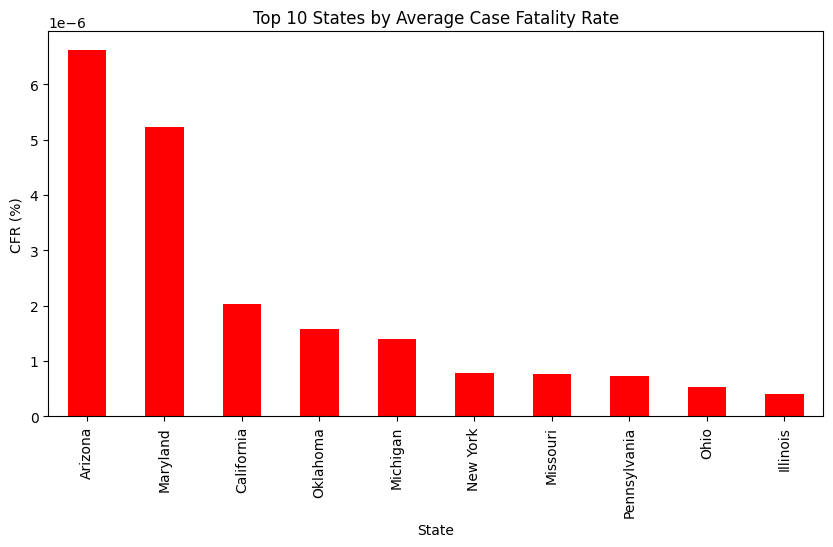

In [39]:
latest = merged_df[merged_df["Date"] == merged_df["Date"].max()] # to filter the most recent date
top_cfr = latest.groupby("State")["CFR (%)"].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
top_cfr.plot(kind='bar', color='red')
plt.title("Top 10 States by Average Case Fatality Rate")
plt.ylabel("CFR (%)")
plt.show()


Need to install plotly before plotting

In [42]:
# !pip install plotly

Summary Data per State: latest total confirmed cases or CFR per state

In [43]:
import plotly.express as px

# Get the latest date's data
latest = merged_df[merged_df["Date"] == merged_df["Date"].max()]

# Group by state and get total confirmed and CFR
state_summary = latest.groupby("State").agg({
    "Confirmed": "sum",
    "COVID-19 Daily Deaths": "sum",
    "CFR (%)": "mean"  # or compute it here: deaths / confirmed * 100
}).reset_index()

# Preview it
state_summary.head()


,State,Confirmed,COVID-19 Daily Deaths,CFR (%)
0,Alabama,110183711,0.000000,0.000000
1,Alaska,8921995,0.000000,0.000000
2,American Samoa,8320,0.000000,0.000000
3,Arizona,36652710,2.428571,0.000007
4,Arkansas,75516225,0.000000,0.000000


Choropleth Map (U.S. States)

In [44]:
# Reverse the dictionary to map full names → abbreviations
state_abbrev = {v: k for k, v in us_state_abbrev.items()}

# Create new column with abbreviations
state_summary["State_Code"] = state_summary["State"].map(state_abbrev)


In [45]:
fig = px.choropleth(
    state_summary,
    locations="State_Code",
    locationmode="USA-states",
    color="Confirmed",
    color_continuous_scale="Reds",
    scope="usa",
    hover_name="State",
    hover_data={
        "Confirmed": True,
        "CFR (%)": True,
        "State_Code": False  # hide the 2-letter code from tooltip
    },
    title="COVID-19 Confirmed Cases with CFR% Hover Info"
)
fig.show()


Peak Outbreak Periods : Find the day with the highest number of new cases in each state.

In [46]:
# Peak outbreak day per state (based on new daily cases)
peak_outbreak = merged_df.loc[merged_df.groupby("State")["New_Cases"].idxmax(), ["State", "Date", "New_Cases"]]
peak_outbreak = peak_outbreak.sort_values(by="New_Cases", ascending=False).head(10)

print("Top 10 Peak Outbreak Days by State:")
print(peak_outbreak)


Top 10 Peak Outbreak Days by State:
                  State       Date  New_Cases
255791       California 2022-01-16   207110.0
415817          Florida 2022-01-04   150251.0
2138120        New York 2022-01-03   132093.0
2237542  North Carolina 2022-01-18   119101.0
1472029        Michigan 2022-01-19    98927.0
558948          Georgia 2022-01-10    96320.0
758811         Illinois 2022-01-18    93335.0
3542994       Wisconsin 2022-01-17    83187.0
3073781           Texas 2022-01-12    76094.0
2687488  South Carolina 2022-01-18    72445.0


**Create the class to input our merged covid data into for dynamic state plotting.**

In [72]:
class covidData:
  def __init__(self, mergedDF):
    self.mergedDF = mergedDF

  def stateCaseToDeathLag(self, state):
    state_data = self.mergedDF[self.mergedDF["State"] == state].copy()

    # Shift cases forward by 1–30 days to see which day has highest correlation
    correlations = []
    for lag in range(1, 31):
        shifted = state_data["New_Cases"].shift(lag)
        correlation = state_data["New_Deaths"].corr(shifted)
        correlations.append((lag, correlation))

    # Convert to DataFrame
    lag_df = pd.DataFrame(correlations, columns=["Lag_Days", "Correlation"])
    best_lag = lag_df.loc[lag_df["Correlation"].idxmax()]

    print(f"Best lag between cases and deaths in {state}: {int(best_lag['Lag_Days'])} days")

  def visualizeCaseTrends(self, state):
    state_data = self.mergedDF[self.mergedDF["State"] == state]

    plt.figure(figsize=(12, 5))
    sns.lineplot(data=state_data, x="Date", y="New_Cases")
    plt.title(f"New Daily COVID-19 Cases in {state}")
    plt.xlabel("Date")
    plt.ylabel("New Cases")
    plt.show()

  def visualizeMovingAvg(self, state):
    state_data = self.mergedDF[self.mergedDF["State"] == state].copy()

    state_data.loc[:, "7_day_avg"] = state_data["New_Cases"].rolling(window=7).mean()

    plt.figure(figsize=(12, 5))
    sns.lineplot(x="Date", y="7_day_avg", data=state_data)
    plt.title(f"7-Day Moving Average of New Cases in {state}")
    plt.show()

Initialize data to the class and select state we want to analyze.

In [73]:
covidStats = covidData(merged_df)

stateToAnalyze = "Texas"

Find the day with the highest number of new cases in each state: Measure the lag (delay) between case surges and death surges using correlation over shifted data.

In [74]:
covidStats.stateCaseToDeathLag(stateToAnalyze)

Best lag between cases and deaths in Texas: 14 days


Visualization - Case Trends

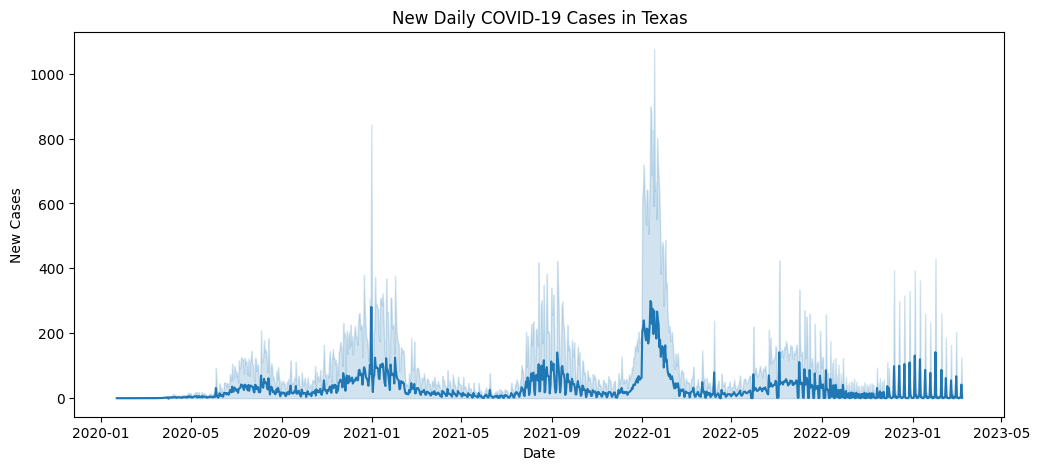

In [69]:
covidStats.visualizeCaseTrends(stateToAnalyze)

Rolling Average(Trend Smoothing)

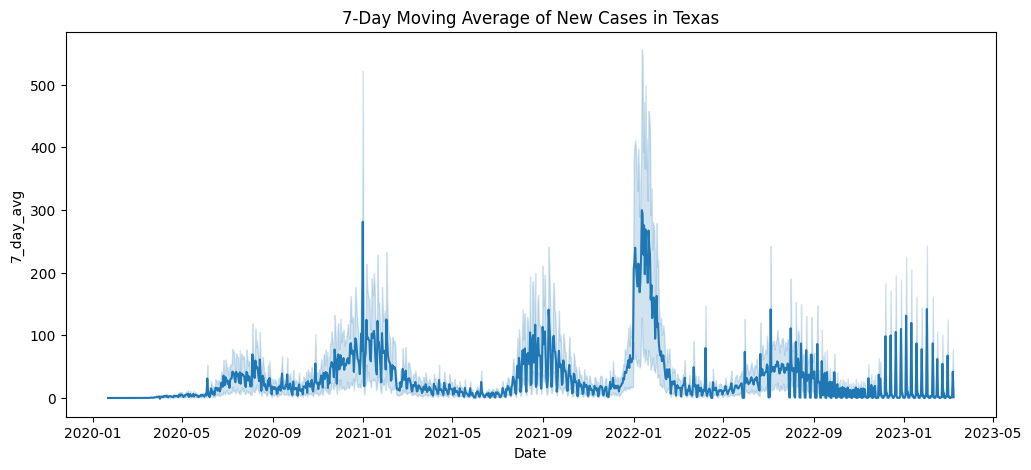

In [75]:
covidStats.visualizeMovingAvg(stateToAnalyze)